In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier as KNN

In [66]:
ins=pd.read_csv("insurance.csv")

In [67]:
ins.head()

,POLICY_NO,PI_NAME,PI_GENDER,SUM_ASSURED,ZONE,PAYMENT_MODE,EARLY_NON,PI_OCCUPATION,MEDICAL_NONMED,PI_STATE,REASON_FOR_CLAIM,PI_AGE,PI_ANNUAL_INCOME,POLICY_STATUS
0,101,A111111,M,"60,000",West,Annual,NON EARLY,Proprietor,NON MEDICAL,Gujarat,Cancer,52,"96,000",Approved Death Claim
1,102,A111112,M,"500,000",AGENCY,Annual,NON EARLY,Proprietor,NON MEDICAL,Madhya Pradesh,NaN,56,"500,000",Repudiate Death
2,103,A111113,M,"300,000",AGENCY,Annual,NON EARLY,Business,NON MEDICAL,Andhra Pradesh,COVID 19,51,0,Approved Death Claim
3,104,A111114,F,"1,000,000",AGENCY,Annual,EARLY,Homemaker,NON MEDICAL,Andhra Pradesh,NaN,52,0,Approved Death Claim
4,105,A111115,M,"10,000,000",RAJASTAN,Annual,EARLY,Banker,NON MEDICAL,Madhya Pradesh,Accidental,26,0,Approved Death Claim


In [68]:
ins.shape

(2005, 14)

In [69]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   POLICY_NO         2005 non-null   int64 
 1   PI_NAME           2005 non-null   object
 2   PI_GENDER         2005 non-null   object
 3   SUM_ASSURED       2005 non-null   object
 4   ZONE              2005 non-null   object
 5   PAYMENT_MODE      2005 non-null   object
 6   EARLY_NON         2005 non-null   object
 7   PI_OCCUPATION     1887 non-null   object
 8   MEDICAL_NONMED    2005 non-null   object
 9   PI_STATE          2005 non-null   object
 10  REASON_FOR_CLAIM  1573 non-null   object
 11  PI_AGE            2005 non-null   int64 
 12  PI_ANNUAL_INCOME  2005 non-null   object
 13  POLICY_STATUS     1790 non-null   object
dtypes: int64(2), object(12)
memory usage: 219.4+ KB


In [70]:
ins.isnull().sum()

POLICY_NO             0
PI_NAME               0
PI_GENDER             0
SUM_ASSURED           0
ZONE                  0
PAYMENT_MODE          0
EARLY_NON             0
PI_OCCUPATION       118
MEDICAL_NONMED        0
PI_STATE              0
REASON_FOR_CLAIM    432
PI_AGE                0
PI_ANNUAL_INCOME      0
POLICY_STATUS       215
dtype: int64

In [71]:
ins['PI_OCCUPATION'].fillna(ins['PI_OCCUPATION'].value_counts().idxmax(), inplace=True)

In [79]:
#ins['REASON_FOR_CLAIM'].fillna(ins['REASON_FOR_CLAIM'].value_counts().idxmax(), inplace=True)
ins1=ins.drop(['POLICY_NO','PI_NAME','REASON_FOR_CLAIM'],axis=1)

In [80]:
ins1.head()

,PI_GENDER,SUM_ASSURED,ZONE,PAYMENT_MODE,EARLY_NON,PI_OCCUPATION,MEDICAL_NONMED,PI_STATE,PI_AGE,PI_ANNUAL_INCOME,POLICY_STATUS
0,M,"60,000",West,Annual,NON EARLY,Proprietor,NON MEDICAL,Gujarat,52,"96,000",Approved Death Claim
1,M,"500,000",AGENCY,Annual,NON EARLY,Proprietor,NON MEDICAL,Madhya Pradesh,56,"500,000",Repudiate Death
2,M,"300,000",AGENCY,Annual,NON EARLY,Business,NON MEDICAL,Andhra Pradesh,51,0,Approved Death Claim
3,F,"1,000,000",AGENCY,Annual,EARLY,Homemaker,NON MEDICAL,Andhra Pradesh,52,0,Approved Death Claim
4,M,"10,000,000",RAJASTAN,Annual,EARLY,Banker,NON MEDICAL,Madhya Pradesh,26,0,Approved Death Claim


In [81]:
insu = ins1

In [82]:
insu.dropna(subset=['POLICY_STATUS'], inplace=True)

In [20]:
#ins['POLICY_STATUS'].fillna(ins['POLICY_STATUS'].value_counts().idxmax(), inplace=True)

In [83]:
insu.isnull().sum()

PI_GENDER           0
SUM_ASSURED         0
ZONE                0
PAYMENT_MODE        0
EARLY_NON           0
PI_OCCUPATION       0
MEDICAL_NONMED      0
PI_STATE            0
PI_AGE              0
PI_ANNUAL_INCOME    0
POLICY_STATUS       0
dtype: int64

In [91]:
insu.shape

(1790, 11)

In [92]:
objList = insu.select_dtypes(include = "object").columns
print (objList)

Index(['PI_GENDER', 'SUM_ASSURED', 'ZONE', 'PAYMENT_MODE', 'EARLY_NON',
       'PI_OCCUPATION', 'MEDICAL_NONMED', 'PI_STATE', 'PI_ANNUAL_INCOME',
       'POLICY_STATUS'],
      dtype='object')


In [93]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    insu[feat] = le.fit_transform(insu[feat].astype(str))

print (insu.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1790 entries, 0 to 2004
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   PI_GENDER         1790 non-null   int32
 1   SUM_ASSURED       1790 non-null   int32
 2   ZONE              1790 non-null   int32
 3   PAYMENT_MODE      1790 non-null   int32
 4   EARLY_NON         1790 non-null   int32
 5   PI_OCCUPATION     1790 non-null   int32
 6   MEDICAL_NONMED    1790 non-null   int32
 7   PI_STATE          1790 non-null   int32
 8   PI_AGE            1790 non-null   int64
 9   PI_ANNUAL_INCOME  1790 non-null   int32
 10  POLICY_STATUS     1790 non-null   int32
dtypes: int32(10), int64(1)
memory usage: 97.9 KB
None


In [94]:
insu.shape

(1790, 11)

In [95]:
X = insu.drop('POLICY_STATUS',axis=1)
y = insu['POLICY_STATUS']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify=y)

In [97]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy",max_depth=5)

tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))

print("Accuracy on testing set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.756
Accuracy on testing set: 0.737


In [98]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=50, random_state=0)

forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))

print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.782


In [99]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.05,max_depth=2)

gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))

print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.760
Accuracy on test set: 0.746


In [100]:
knn = KNN(n_neighbors=5)

knn.fit(X_train,y_train) 

knn.score(X_train,y_train)

0.7674581005586593

In [101]:
knn.score(X_test,y_test)

0.6927374301675978

In [102]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)

km.fit(X)

KMeans(n_clusters=2)

In [103]:
identified_clusters = km.fit_predict(X)
identified_clusters

array([1, 1, 1, ..., 1, 0, 1])

In [104]:
ins_clusters = insu.copy()

In [105]:
ins_clusters.head()

,PI_GENDER,SUM_ASSURED,ZONE,PAYMENT_MODE,EARLY_NON,PI_OCCUPATION,MEDICAL_NONMED,PI_STATE,PI_AGE,PI_ANNUAL_INCOME,POLICY_STATUS
0,1,554,31,0,1,75,1,8,52,96,0
1,1,498,0,0,1,75,1,15,56,66,1
2,1,344,0,0,1,13,1,1,51,0,0
3,0,1,0,0,0,46,1,1,52,0,0
4,1,47,15,0,0,11,1,15,26,0,0


In [106]:
ins_clusters['Clusters'] = identified_clusters 

In [107]:
ins_clusters.head()

,PI_GENDER,SUM_ASSURED,ZONE,PAYMENT_MODE,EARLY_NON,PI_OCCUPATION,MEDICAL_NONMED,PI_STATE,PI_AGE,PI_ANNUAL_INCOME,POLICY_STATUS,Clusters
0,1,554,31,0,1,75,1,8,52,96,0,1
1,1,498,0,0,1,75,1,15,56,66,1,1
2,1,344,0,0,1,13,1,1,51,0,0,1
3,0,1,0,0,0,46,1,1,52,0,0,0
4,1,47,15,0,0,11,1,15,26,0,0,0


In [108]:
ins_clusters.to_excel (r'C:\Users\acer\Downloads\SpJain\classes\dec21\21.12.21\INS Clusters.xlsx', index = False, header=True)

In [109]:
df = ins_clusters

In [110]:
df['correct'] = df.POLICY_STATUS == df.Clusters

In [111]:
df.head()

,PI_GENDER,SUM_ASSURED,ZONE,PAYMENT_MODE,EARLY_NON,PI_OCCUPATION,MEDICAL_NONMED,PI_STATE,PI_AGE,PI_ANNUAL_INCOME,POLICY_STATUS,Clusters,correct
0,1,554,31,0,1,75,1,8,52,96,0,1,False
1,1,498,0,0,1,75,1,15,56,66,1,1,True
2,1,344,0,0,1,13,1,1,51,0,0,1,False
3,0,1,0,0,0,46,1,1,52,0,0,0,True
4,1,47,15,0,0,11,1,15,26,0,0,0,True


In [112]:
grouped = df.groupby('POLICY_STATUS').agg({'POLICY_STATUS': 'size','correct': 'sum'})

In [113]:
grouped.head()

,POLICY_STATUS,correct
POLICY_STATUS,,
0,1218,661
1,572,275


In [114]:
grouped['acc'] = grouped['correct'] / grouped['POLICY_STATUS']
print(grouped)

Accuracy = grouped['acc'].mean()

print(Accuracy)

               POLICY_STATUS  correct       acc
POLICY_STATUS                                  
0                       1218      661  0.542693
1                        572      275  0.480769
0.5117310850069471


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


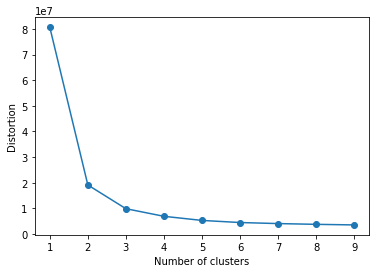

In [115]:
import matplotlib.pyplot  as plt
distortions = []
for i in range(1,10):
    kmeans = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,random_state=0)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# plot
plt.plot(range(1, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()